# Performace Analysis of Area Offices for Electricity Distribution

## Goal

*Ensure the data is clean, structured, and ready for analysis.*
*Identify any patterns, trends, or anomalies in the data.*
*Evaluate the performance of each Area office based on key indicators.*
*Identify performance trends and patterns, and communicate insights effectively.*
*Offer actionable suggestions supported by analysis findings to enhance the operational efficiency of each Area office.*

## Setup

### Importing the necessary libraries

In [121]:
import pandas as pd
from decimal import Decimal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading the data

In [122]:
df = pd.read_csv('/Users/adeola/Documents/Credentials/LSE/Data Analysis Accelerator/Energy/Area_offices_metrics.csv')

## Data Exploration

In [123]:
# Displaying the first few rows of the data
df.head()

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
0,AO14,11KVF13,0,0,0.00,0.00,0,0,0.00,0,January,2020
1,AO14,11KVF13,0,0,0.00,0.00,0,0,0.00,0,Feburary,2020
2,AO14,11KVF13,0,0,0.00,0.00,0,0,0.00,0,March,2020
3,AO14,11KVF13,0,0,0.00,0.00,0,0,0.00,0,April,2020
4,AO14,11KVF13,0,0,0.00,0.00,0,0,0.00,0,May,2020


In [124]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7456 entries, 0 to 7455
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Area Office                   7456 non-null   object 
 1   Feeders                       7456 non-null   object 
 2   Total Customer                7456 non-null   int64  
 3   Total Customer Payment Count  7456 non-null   int64  
 4   Total Collection              7456 non-null   float64
 5   Energy Distributed (Naira)    7456 non-null   float64
 6   Energy Received (kWh)         7454 non-null   object 
 7   Energy Distributed (kWh)      7456 non-null   object 
 8   Collection Margin             7456 non-null   float64
 9   Energy Loss (kWh)             7456 non-null   object 
 10  Month                         7456 non-null   object 
 11  Year                          7456 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 699.1+ KB


In [125]:
# Displaying summary statistics
df.describe()

,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Collection Margin,Year
count,7456.00,7456.00,7456.00,7456.00,7456.00,7456.00
mean,2400.20,682.89,6948837.71,22812552.38,15847678.40,2020.88
std,2612.45,789.00,10961125.05,27194194.72,23205757.78,0.78
min,0.00,0.00,0.00,0.00,-266955134.50,2020.00
25%,312.75,9.00,733130.50,2927298.77,750041.97,2020.00
50%,1576.00,376.00,3757815.92,13180568.97,7828367.81,2021.00
75%,4120.50,1101.00,9348168.63,32803339.19,21985160.04,2021.25
max,18128.00,4941.00,324398856.00,267548868.83,261046159.21,2022.00


In [126]:
# Exploring unique values and categories
for col in df.columns:
    print(col, df[col].nunique())

Area Office 15
Feeders 242
Total Customer 3000
Total Customer Payment Count 2131
Total Collection 6058
Energy Distributed (Naira) 6304
Energy Received (kWh) 4928
Energy Distributed (kWh) 6264
Collection Margin 6333
Energy Loss (kWh) 6357
Month 12
Year 3


In [127]:
# Checking for missing values
print(df.isnull().sum())

Area Office                     0
Feeders                         0
Total Customer                  0
Total Customer Payment Count    0
Total Collection                0
Energy Distributed (Naira)      0
Energy Received (kWh)           2
Energy Distributed (kWh)        0
Collection Margin               0
Energy Loss (kWh)               0
Month                           0
Year                            0
dtype: int64


## Data Cleaning

### Checking for correctness in the Month column

In [128]:
# Identifying unique data in Month column
month_distinct_values = df['Month'].unique()

# Veiw distinct_values
month_distinct_values

array(['January', 'Feburary', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [129]:
# Defining a dictionary to map incorrect month name to correct month name
correction_map = {
    'Feburary': 'February',
}

# Replace incorrect month name with correct one
df['Month'] = df['Month'].replace(correction_map)

In [130]:
# Define a dictionary to map month names to their numeric representations
month_to_number = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert 'Month' column to numeric by mapping month names to their corresponding numeric values
df['Month'] = df['Month'].map(month_to_number)

### Confirm Implementation

In [131]:
# Identifing unique data in Month column
month_distinct_values = df['Month'].unique()

# Veiw distinct_values 
month_distinct_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Change datatypes to allow for ease of Analysis

In [132]:
# Converting Area Office and Feeders column to categorical data type
df['Area Office'] = df['Area Office'].astype('category')
df['Feeders'] = df['Feeders'].astype('category')

In [133]:
# Converting 'Energy Received (kWh)',  Energy Distribute(kwh),Energy Loss (kWh) column to numeric data type
df['Energy Received (kWh)'] = pd.to_numeric(df['Energy Received (kWh)'], errors='coerce')
df['Energy Distributed (kWh)'] = pd.to_numeric(df['Energy Distributed (kWh)'], errors='coerce')
df['Energy Loss (kWh)'] = pd.to_numeric(df['Energy Loss (kWh)'], errors='coerce')

In [134]:
# Converting monetary columns to 'float64' data type
df['Total Collection'] = df['Total Collection'].astype(float)
df['Energy Distributed (Naira)'] = df['Energy Distributed (Naira)'].astype(float)
df['Collection Margin'] = df['Collection Margin'].astype(float)

In [135]:
# Setting custom display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

#### Confirm Implementation

In [136]:
# Displaying basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7456 entries, 0 to 7455
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Area Office                   7456 non-null   category
 1   Feeders                       7456 non-null   category
 2   Total Customer                7456 non-null   int64   
 3   Total Customer Payment Count  7456 non-null   int64   
 4   Total Collection              7456 non-null   float64 
 5   Energy Distributed (Naira)    7456 non-null   float64 
 6   Energy Received (kWh)         7012 non-null   float64 
 7   Energy Distributed (kWh)      7432 non-null   float64 
 8   Collection Margin             7456 non-null   float64 
 9   Energy Loss (kWh)             6973 non-null   float64 
 10  Month                         7456 non-null   int64   
 11  Year                          7456 non-null   int64   
dtypes: category(2), float64(6), int64(4)
memory usag

### Correct Zero Values
*Based on the Metadata file, Collection Margin is the difference between Energy Distributed (Naira)
and Total Collection which must be a positive number. Energy Loss(KWh) is the difference between the
Energy Recived and Energy Distributed and the Value must be Positive.*

In [137]:
# Creating a new DataFrame where Collection Margin is less than 0 or NaN or null,
# and Total Collection and Energy Distributed (Naira) are not null or NaN
df2 = df[(df['Collection Margin'] < 0) | (df['Collection Margin'].isna()) & 
            (~df['Total Collection'].isna()) & (~df['Energy Distributed (Naira)'].isna())]


In [138]:
#View DataFrame
df2

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
755,AO11,11KVF154,1,1,1134760.00,399404.80,0.00,9495.00,-735355.20,-9495.00,2,2020
758,AO11,11KVF154,1,1,1250400.00,370548.38,0.00,8809.00,-879851.62,0.00,5,2020
759,AO11,11KVF154,1,1,830000.00,479664.34,0.00,11403.00,-350335.66,0.00,6,2020
761,AO11,11KVF154,1,1,538000.00,503641.25,36000.00,11973.00,-34358.75,24027.00,8,2020
765,AO11,11KVF154,1,1,1119100.00,1117020.46,50644.00,16546.00,-2079.54,34098.00,12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7121,AO14,11KVF89,6729,2417,12341545.56,12063346.84,1637000.00,396509.00,-278198.72,1240491.00,4,2020
7149,AO14,11KVF8,6900,2480,13595081.48,12265397.58,1125000.00,400313.00,-1329683.90,724687.00,6,2020
7159,AO14,11KVF89,6948,3344,17729135.30,11994573.10,1311000.00,397958.00,-5734562.20,913042.00,6,2020
7207,AO8,33KVF183,7259,1339,15726328.33,15254892.26,1091888.00,372588.00,-471436.07,719300.00,6,2022


In [139]:
# Updating Collection Margin column by subtracting Total Collection from Energy Distributed (Naira)
df2.loc[:, 'Collection Margin'] = df2['Energy Distributed (Naira)'] - df2['Total Collection']

In [140]:
# Updating df with changes made in df2
df.update(df2)

In [141]:
# Creating a new DataFrame where Total Collection is NaN or Null and Collection Margin and Energy Distributed (Naira) are not NaN or Null
df3 = df[(df['Total Collection'].isna() | df['Total Collection'].isnull()) & 
         (~df['Collection Margin'].isna()) & (~df['Energy Distributed (Naira)'].isna())]

In [142]:
#View DataFrame
df3

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year


In [143]:
# Filtering the DataFrame based on the conditions
df4 = df[(df['Energy Distributed (Naira)'].isnull() | df['Total Collection'].isnull()) & 
         (~df['Collection Margin'].isnull() & ~df['Total Collection'].isnull())]

# Veiw the new DataFrame
df4

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year


In [144]:
# Dropping rows where Collection Margin is negative
df = df[df['Collection Margin'] >= 0]

# Veiw the updated DataFrame
df

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
0,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1,2020
1,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2,2020
2,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,3,2020
3,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,4,2020
4,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7451,AO6,33KVF200,18034,2637,10243170.00,45263032.02,635713.00,752660.00,35019862.02,-116947.00,4,2022
7452,AO6,33KVF200,18069,2177,10795535.78,54345468.36,755516.00,908258.00,43549932.58,-152742.00,5,2022
7453,AO6,33KVF200,18090,2079,9078160.68,102233830.66,328224.00,2734950.00,93155669.98,-2406726.00,6,2022
7454,AO6,33KVF200,18090,2079,9078160.68,102233830.66,650300.00,2734950.00,93155669.98,-2084650.00,8,2022


In [145]:
# Creating a new DataFrame where Energy Loss (kWh) is less than 0 or NaN/null
df5 = df[(df['Energy Loss (kWh)'] < 0) | (df['Energy Loss (kWh)'].isna())]

# Filtering out rows where Energy Received (kWh) and Energy Distributed (kWh) are not null or NaN
df5 = df5[(~df5['Energy Received (kWh)'].isna()) & (~df5['Energy Distributed (kWh)'].isna())]

# Displaying the new DataFrame
df5

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
508,AO2,33KVF181,0,0,0.00,0.00,-121131.00,0.00,0.00,-121131.00,6,2021
524,AO14,33KVF182,0,0,0.00,0.00,-299500.00,0.00,0.00,-299500.00,2,2020
525,AO14,33KVF182,0,0,0.00,0.00,-401800.00,0.00,0.00,-401800.00,3,2020
542,AO14,33KVF182,0,0,0.00,0.00,-10932.00,0.00,0.00,-10932.00,8,2021
543,AO14,33KVF182,0,0,0.00,0.00,129261.00,0.00,0.00,-10932.00,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
7451,AO6,33KVF200,18034,2637,10243170.00,45263032.02,635713.00,752660.00,35019862.02,-116947.00,4,2022
7452,AO6,33KVF200,18069,2177,10795535.78,54345468.36,755516.00,908258.00,43549932.58,-152742.00,5,2022
7453,AO6,33KVF200,18090,2079,9078160.68,102233830.66,328224.00,2734950.00,93155669.98,-2406726.00,6,2022
7454,AO6,33KVF200,18090,2079,9078160.68,102233830.66,650300.00,2734950.00,93155669.98,-2084650.00,8,2022


In [146]:
# Updating Energy Loss (kWh) column by subtracting Energy Distributed (kWh) from Energy Received (kWh)
df5.loc[:, 'Energy Loss (kWh)'] = df5['Energy Received (kWh)'] - df5['Energy Distributed (kWh)']

In [147]:
# Updating df with changes made in df5
df.update(df5)

In [148]:
# Creating a new DataFrame where Energy Distributed (kWh) is NaN or Null and Energy Received (kWh) 
# and Energy Loss (kWh) are not NaN or Null

df6 = df[df['Energy Distributed (kWh)'].isna() | df['Energy Distributed (kWh)'].isnull()]
df6 = df6[~df6['Energy Received (kWh)'].isna()]
df6 = df6[~df6['Energy Loss (kWh)'].isna()]

# Veiw the new DataFrame
df6

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year


In [149]:
# Creating a new DataFrame where Energy Received (kWh) is NaN or Null and Energy Distributed (kWh) and Energy Loss (kWh) are not NaN or Null
df7 = df[df['Energy Received (kWh)'].isna() | df['Energy Received (kWh)'].isnull()]
df7 = df7[~df7['Energy Distributed (kWh)'].isna()]
df7 = df7[~df7['Energy Loss (kWh)'].isna()]

# Veiw the new DataFrame
df7

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
179,AO10,11KVF98,0,0,0.00,0.00,NaN,0.00,0.00,5694.00,9,2021
1388,AO4,33KVF214,10,2,62000.00,127212.62,NaN,2066.00,65212.62,208592.00,9,2021
1656,AO5,11KVF1,64,34,243300.00,364500.23,NaN,12331.00,121200.23,-12331.00,1,2020
5981,AO12,11KVF123,4676,2038,11276130.00,53518046.70,NaN,1037766.00,42241916.70,283357.00,9,2021


In [150]:
# Updating Energy Received (kWh) column by adding Energy Distributed (kWh) and  Energy Loss (kWh)
df7.loc[:, 'Energy Received (kWh)'] = df7['Energy Distributed (kWh)'] + df7['Energy Loss (kWh)']

In [151]:
# Updating df with changes made in df7
df.update(df7)

# Veiw the new DataFrame
df

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
0,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1,2020
1,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2,2020
2,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,3,2020
3,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,4,2020
4,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7451,AO6,33KVF200,18034,2637,10243170.00,45263032.02,635713.00,752660.00,35019862.02,-116947.00,4,2022
7452,AO6,33KVF200,18069,2177,10795535.78,54345468.36,755516.00,908258.00,43549932.58,-152742.00,5,2022
7453,AO6,33KVF200,18090,2079,9078160.68,102233830.66,328224.00,2734950.00,93155669.98,-2406726.00,6,2022
7454,AO6,33KVF200,18090,2079,9078160.68,102233830.66,650300.00,2734950.00,93155669.98,-2084650.00,8,2022


In [152]:
# Dropping rows where Energy Loss (kWh) is negative
df = df[df['Energy Loss (kWh)'] >= 0]

# View the updated DataFrame
df

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
0,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1,2020
1,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,2,2020
2,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,3,2020
3,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,4,2020
4,AO14,11KVF13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,5,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7422,AO1,33KVF236,15974,2306,18514307.76,116943052.06,2822900.00,1882398.00,98428744.30,940502.00,8,2022
7423,AO1,33KVF236,16003,2306,9149576.60,39114509.02,1123485.00,633544.00,29964932.42,489941.00,7,2022
7436,AO6,33KVF200,17385,1528,6222270.60,28027369.61,683000.00,680207.00,21805099.01,2793.00,1,2021
7444,AO6,33KVF200,17559,2397,9845886.78,26713265.30,747902.00,755190.00,16867378.52,245831.00,9,2021


In [153]:
# Dropping rows where Total Customer is 0 or less
df = df[df['Total Customer'] > 0]

# View the updated DataFrame
df

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
698,AO14,11KVF39,1,0,0.00,0.00,0.00,0.00,0.00,0.00,1,2020
700,AO14,11KVF39,1,0,0.00,0.00,0.00,0.00,0.00,0.00,3,2020
701,AO14,11KVF39,1,0,0.00,0.00,0.00,0.00,0.00,0.00,4,2020
702,AO14,11KVF39,1,0,0.00,0.00,0.00,0.00,0.00,0.00,5,2020
703,AO14,11KVF39,1,0,0.00,0.00,0.00,0.00,0.00,0.00,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
7422,AO1,33KVF236,15974,2306,18514307.76,116943052.06,2822900.00,1882398.00,98428744.30,940502.00,8,2022
7423,AO1,33KVF236,16003,2306,9149576.60,39114509.02,1123485.00,633544.00,29964932.42,489941.00,7,2022
7436,AO6,33KVF200,17385,1528,6222270.60,28027369.61,683000.00,680207.00,21805099.01,2793.00,1,2021
7444,AO6,33KVF200,17559,2397,9845886.78,26713265.30,747902.00,755190.00,16867378.52,245831.00,9,2021


In [154]:
# Dropping rows where Energy Received(kWh) is 0 or less
df = df[df['Energy Received (kWh)'] > 0]

# View the updated DataFrame
df

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
766,AO11,11KVF154,1,1,600000.00,1183652.83,36626.00,17533.00,583652.83,19093.00,1,2021
767,AO11,11KVF154,1,0,0.00,1186420.74,29285.00,17574.00,1186420.74,11711.00,2,2021
769,AO11,11KVF154,1,0,0.00,872312.13,37950.00,12217.00,872312.13,25733.00,4,2021
771,AO11,11KVF154,1,0,0.00,1856796.01,46350.00,26005.00,1856796.01,20345.00,6,2021
774,AO11,11KVF154,1,0,0.00,1616735.52,35880.00,21981.00,1616735.52,7188.00,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
7422,AO1,33KVF236,15974,2306,18514307.76,116943052.06,2822900.00,1882398.00,98428744.30,940502.00,8,2022
7423,AO1,33KVF236,16003,2306,9149576.60,39114509.02,1123485.00,633544.00,29964932.42,489941.00,7,2022
7436,AO6,33KVF200,17385,1528,6222270.60,28027369.61,683000.00,680207.00,21805099.01,2793.00,1,2021
7444,AO6,33KVF200,17559,2397,9845886.78,26713265.30,747902.00,755190.00,16867378.52,245831.00,9,2021


#### Confirm Implementation

In [155]:
# Counting rows where Energy Distributed (kWh) is greater than Energy Received (kWh)
count_energy_discrepancy = df[df['Energy Distributed (kWh)'] > df['Energy Received (kWh)']].shape[0]

# Print the count
print("Number of rows where Energy Distributed (kWh) is" 
      "greater than Energy Received (kWh):", count_energy_discrepancy)


Number of rows where Energy Distributed (kWh) isgreater than Energy Received (kWh): 170


In [156]:
# Dropping rows where Energy Distributed (kWh) is greater than Energy Received (kWh)
df = df[df['Energy Distributed (kWh)'] <= df['Energy Received (kWh)']]

In [157]:
# Counting rows where Energy Distributed (kWh) is greater than Energy Received (kWh)
count_energy_discrepancy = df[df['Energy Distributed (kWh)'] > df['Energy Received (kWh)']].shape[0]

# Print the count
print("Number of rows where Energy Distributed (kWh) is" 
      "greater than Energy Received (kWh):", count_energy_discrepancy)

Number of rows where Energy Distributed (kWh) isgreater than Energy Received (kWh): 0


In [158]:
# Counting rows where Energy Loss (kWh) is greater than Energy Received (kWh)
count_energy_loss_gt_received = (df['Energy Loss (kWh)'] > df['Energy Received (kWh)']).sum()

# Print the count
print("Number of rows where Energy Loss (kWh) is greater than"
      " Energy Received (kWh):", count_energy_loss_gt_received)

Number of rows where Energy Loss (kWh) is greater than Energy Received (kWh): 11


In [159]:
# Creating a boolean mask where Energy Loss (kWh) is greater than Energy Received (kWh)
mask = df['Energy Loss (kWh)'] > df['Energy Received (kWh)']

# Creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_copy = df.copy()

# Dropping rows where Energy Loss (kWh) is greater than Energy Received (kWh)
df_copy.drop(df_copy[mask].index, inplace=True)

# Reset the index after dropping rows
df_copy.reset_index(drop=True, inplace=True)

In [160]:
# Counting rows where Energy Loss (kWh) is greater than Energy Received (kWh)
count_energy_loss_gt_received = (df_copy['Energy Loss (kWh)'] > df_copy['Energy Received (kWh)']).sum()

# Print the count
print("Number of rows where Energy Loss (kWh) is greater than"
      " Energy Received (kWh):", count_energy_loss_gt_received)

Number of rows where Energy Loss (kWh) is greater than Energy Received (kWh): 0


In [161]:
# Counting the number of rows where Energy Received (kWh) is negative
negative_energy_received_count = (df_copy['Energy Received (kWh)'] < 0).sum()

# Print the count
print("Number of rows where Energy Received (kWh) is negative:", negative_energy_received_count)

Number of rows where Energy Received (kWh) is negative: 0


In [162]:
# Counting the number of rows where Total Collection is greater than Energy Distributed (Naira)
count_total_collection_greater_than_energy_distributed = (df_copy['Total Collection'] > 
                                                          df_copy['Energy Distributed (Naira)']).sum()

# Print the count
print("Number of rows where Total Collection is greater than"
      " Energy Distributed (Naira):", count_total_collection_greater_than_energy_distributed)

Number of rows where Total Collection is greater than Energy Distributed (Naira): 0


In [163]:
# Counting the number of rows where Collection Margin is greater than Energy Distributed (Naira)
count_margin_greater_than_energy_distributed = (df_copy['Collection Margin'] > 
                                                df_copy['Energy Distributed (Naira)']).sum()

# Print the count
print("Number of rows where Collection Margin is greater than "
      "Energy Distributed (Naira):", count_margin_greater_than_energy_distributed)


Number of rows where Collection Margin is greater than Energy Distributed (Naira): 0


In [164]:
# Counting the number of rows where Energy Distributed (Naira) is negative
count_negative_energy_distributed = (df_copy['Energy Distributed (Naira)'] < 0).sum()

# Print the count
print("Number of rows where Energy Distributed (Naira) is negative:", count_negative_energy_distributed)

Number of rows where Energy Distributed (Naira) is negative: 0


In [165]:
# Filtering rows where Collection Margin is negative
negative_collection_margin_count = df_copy[df_copy['Collection Margin'] < 0].shape[0]

# Display the count of rows where Collection Margin is negative
print("Number of rows where Collection Margin is negative:", negative_collection_margin_count)

Number of rows where Collection Margin is negative: 0


In [166]:
# Verifying that there are no more missing values
print(df_copy.isnull().sum())

Area Office                     0
Feeders                         0
Total Customer                  0
Total Customer Payment Count    0
Total Collection                0
Energy Distributed (Naira)      0
Energy Received (kWh)           0
Energy Distributed (kWh)        0
Collection Margin               0
Energy Loss (kWh)               0
Month                           0
Year                            0
dtype: int64


### Copy Clean Data

In [167]:
# Save the DataFrame as a CSV file
df_copy.to_csv('metrics_cleaned.csv', index=False)

## Performance Metrics Calculation

In [170]:
# Loading the data into a pandas DataFrame
metrics_cleaned = pd.read_csv('/Users/adeola/Documents/Credentials/LSE/Data Analysis Accelerator/Energy/metrics_cleaned.csv')

In [171]:
# Displaying the first few rows of the data
metrics_cleaned.head()

,Area Office,Feeders,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Month,Year
0,AO11,11KVF154,1,1,600000.00,1183652.83,36626.00,17533.00,583652.83,19093.00,1,2021
1,AO11,11KVF154,1,0,0.00,1186420.74,29285.00,17574.00,1186420.74,11711.00,2,2021
2,AO11,11KVF154,1,0,0.00,872312.13,37950.00,12217.00,872312.13,25733.00,4,2021
3,AO11,11KVF154,1,0,0.00,1856796.01,46350.00,26005.00,1856796.01,20345.00,6,2021
4,AO11,11KVF154,1,0,0.00,1616735.52,35880.00,21981.00,1616735.52,7188.00,9,2021


In [172]:
# Defining the aggregation functions for each column
aggregation_functions = {
    'Total Customer': 'sum',
    'Total Customer Payment Count': 'sum',
    'Total Collection': 'sum',
    'Energy Distributed (Naira)': 'sum',
    'Energy Received (kWh)': 'sum',
    'Energy Distributed (kWh)': 'sum',
    'Collection Margin': 'sum',
    'Energy Loss (kWh)': 'sum',
}

# Aggregating the DataFrame by 'Area Office', 'Feeders', 'Month', and 'Year'
metrics_cleaned = metrics_cleaned.groupby(['Area Office', 'Feeders', 'Month', 'Year']).agg(aggregation_functions).reset_index()

# Veiw the aggregated DataFrame
metrics_cleaned

,Area Office,Feeders,Month,Year,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh)
0,AO1,11KVF114,1,2020,1270,625,4719336.94,10853427.44,788000.00,365415.00,6134090.50,422585.00
1,AO1,11KVF114,1,2021,1358,807,6775508.73,27489940.50,1149581.00,494816.00,20714431.77,654765.00
2,AO1,11KVF114,1,2022,1421,790,8186246.32,42009023.67,1372385.00,695537.00,33822777.35,676848.00
3,AO1,11KVF114,2,2020,1268,593,4104958.74,18135715.89,1093000.00,598181.00,14030757.15,494819.00
4,AO1,11KVF114,2,2021,1364,785,7094562.71,27066630.38,1092208.00,487352.00,19972067.67,604856.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4614,AO9,11KVF155,4,2020,2,0,0.00,128681.31,38000.00,2707.00,128681.31,35293.00
4615,AO9,11KVF155,5,2020,2,0,0.00,51434.49,77000.00,1082.00,51434.49,75918.00
4616,AO9,11KVF155,6,2020,2,0,0.00,27618.71,77000.00,581.00,27618.71,76419.00
4617,AO9,11KVF155,7,2020,2,0,0.00,24909.13,33000.00,524.00,24909.13,32476.00


In [173]:
# Computing billing efficiency and store the result in a new column
metrics_cleaned.loc[:, 'Billing Efficiency'] = metrics_cleaned['Energy Distributed (kWh)'] / metrics_cleaned['Energy Received (kWh)']

# Veiw the DataFrame with the new column
metrics_cleaned

,Area Office,Feeders,Month,Year,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Billing Efficiency
0,AO1,11KVF114,1,2020,1270,625,4719336.94,10853427.44,788000.00,365415.00,6134090.50,422585.00,0.46
1,AO1,11KVF114,1,2021,1358,807,6775508.73,27489940.50,1149581.00,494816.00,20714431.77,654765.00,0.43
2,AO1,11KVF114,1,2022,1421,790,8186246.32,42009023.67,1372385.00,695537.00,33822777.35,676848.00,0.51
3,AO1,11KVF114,2,2020,1268,593,4104958.74,18135715.89,1093000.00,598181.00,14030757.15,494819.00,0.55
4,AO1,11KVF114,2,2021,1364,785,7094562.71,27066630.38,1092208.00,487352.00,19972067.67,604856.00,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,AO9,11KVF155,4,2020,2,0,0.00,128681.31,38000.00,2707.00,128681.31,35293.00,0.07
4615,AO9,11KVF155,5,2020,2,0,0.00,51434.49,77000.00,1082.00,51434.49,75918.00,0.01
4616,AO9,11KVF155,6,2020,2,0,0.00,27618.71,77000.00,581.00,27618.71,76419.00,0.01
4617,AO9,11KVF155,7,2020,2,0,0.00,24909.13,33000.00,524.00,24909.13,32476.00,0.02


In [174]:
# Computing collection efficiency and store the result in a new column
metrics_cleaned.loc[:, 'Collection Efficiency'] = metrics_cleaned['Total Collection'] / metrics_cleaned['Energy Distributed (Naira)']

# Veiw the DataFrame with the new column
metrics_cleaned

,Area Office,Feeders,Month,Year,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Billing Efficiency,Collection Efficiency
0,AO1,11KVF114,1,2020,1270,625,4719336.94,10853427.44,788000.00,365415.00,6134090.50,422585.00,0.46,0.43
1,AO1,11KVF114,1,2021,1358,807,6775508.73,27489940.50,1149581.00,494816.00,20714431.77,654765.00,0.43,0.25
2,AO1,11KVF114,1,2022,1421,790,8186246.32,42009023.67,1372385.00,695537.00,33822777.35,676848.00,0.51,0.19
3,AO1,11KVF114,2,2020,1268,593,4104958.74,18135715.89,1093000.00,598181.00,14030757.15,494819.00,0.55,0.23
4,AO1,11KVF114,2,2021,1364,785,7094562.71,27066630.38,1092208.00,487352.00,19972067.67,604856.00,0.45,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,AO9,11KVF155,4,2020,2,0,0.00,128681.31,38000.00,2707.00,128681.31,35293.00,0.07,0.00
4615,AO9,11KVF155,5,2020,2,0,0.00,51434.49,77000.00,1082.00,51434.49,75918.00,0.01,0.00
4616,AO9,11KVF155,6,2020,2,0,0.00,27618.71,77000.00,581.00,27618.71,76419.00,0.01,0.00
4617,AO9,11KVF155,7,2020,2,0,0.00,24909.13,33000.00,524.00,24909.13,32476.00,0.02,0.00


In [175]:
# Calculating AT&C Losses
metrics_cleaned['AT&C Losses'] = (1 - (metrics_cleaned['Billing Efficiency'] * metrics_cleaned['Collection Efficiency'])) * 100

# Veiw the DataFrame with the new column
metrics_cleaned

,Area Office,Feeders,Month,Year,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Billing Efficiency,Collection Efficiency,AT&C Losses
0,AO1,11KVF114,1,2020,1270,625,4719336.94,10853427.44,788000.00,365415.00,6134090.50,422585.00,0.46,0.43,79.84
1,AO1,11KVF114,1,2021,1358,807,6775508.73,27489940.50,1149581.00,494816.00,20714431.77,654765.00,0.43,0.25,89.39
2,AO1,11KVF114,1,2022,1421,790,8186246.32,42009023.67,1372385.00,695537.00,33822777.35,676848.00,0.51,0.19,90.12
3,AO1,11KVF114,2,2020,1268,593,4104958.74,18135715.89,1093000.00,598181.00,14030757.15,494819.00,0.55,0.23,87.61
4,AO1,11KVF114,2,2021,1364,785,7094562.71,27066630.38,1092208.00,487352.00,19972067.67,604856.00,0.45,0.26,88.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,AO9,11KVF155,4,2020,2,0,0.00,128681.31,38000.00,2707.00,128681.31,35293.00,0.07,0.00,100.00
4615,AO9,11KVF155,5,2020,2,0,0.00,51434.49,77000.00,1082.00,51434.49,75918.00,0.01,0.00,100.00
4616,AO9,11KVF155,6,2020,2,0,0.00,27618.71,77000.00,581.00,27618.71,76419.00,0.01,0.00,100.00
4617,AO9,11KVF155,7,2020,2,0,0.00,24909.13,33000.00,524.00,24909.13,32476.00,0.02,0.00,100.00


In [176]:
# View DataFrame info
metrics_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Area Office                   4619 non-null   object 
 1   Feeders                       4619 non-null   object 
 2   Month                         4619 non-null   int64  
 3   Year                          4619 non-null   int64  
 4   Total Customer                4619 non-null   int64  
 5   Total Customer Payment Count  4619 non-null   int64  
 6   Total Collection              4619 non-null   float64
 7   Energy Distributed (Naira)    4619 non-null   float64
 8   Energy Received (kWh)         4619 non-null   float64
 9   Energy Distributed (kWh)      4619 non-null   float64
 10  Collection Margin             4619 non-null   float64
 11  Energy Loss (kWh)             4619 non-null   float64
 12  Billing Efficiency            4619 non-null   float64
 13  Col

In [177]:
# Filtering rows where AT&C Losses is null
rows_with_null_atc_losses = metrics_cleaned[metrics_cleaned['AT&C Losses'].isnull()]

# Veiw rows where AT&C Losses is null
rows_with_null_atc_losses

,Area Office,Feeders,Month,Year,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Billing Efficiency,Collection Efficiency,AT&C Losses
2717,AO3,11KVF105,1,2022,5,0,0.00,0.00,5899.00,0.00,0.00,5899.00,0.00,NaN,NaN
2718,AO3,11KVF105,2,2022,5,0,0.00,0.00,6987.00,0.00,0.00,6987.00,0.00,NaN,NaN
2719,AO3,11KVF105,4,2022,5,0,0.00,0.00,11808.00,0.00,0.00,11808.00,0.00,NaN,NaN
2720,AO3,11KVF105,5,2022,5,0,0.00,0.00,23716.00,0.00,0.00,23716.00,0.00,NaN,NaN
2721,AO3,11KVF105,6,2021,5,0,0.00,0.00,7063.00,0.00,0.00,7063.00,0.00,NaN,NaN
2722,AO3,11KVF105,6,2022,5,0,0.00,0.00,7321.00,0.00,0.00,7321.00,0.00,NaN,NaN
2723,AO3,11KVF105,7,2022,5,0,0.00,0.00,6038.00,0.00,0.00,6038.00,0.00,NaN,NaN
2724,AO3,11KVF105,8,2022,5,0,0.00,0.00,7300.00,0.00,0.00,7300.00,0.00,NaN,NaN
2725,AO3,11KVF105,10,2021,5,0,0.00,0.00,5272.00,0.00,0.00,5272.00,0.00,NaN,NaN
2726,AO3,11KVF105,11,2021,5,0,0.00,0.00,5272.00,0.00,0.00,5272.00,0.00,NaN,NaN


In [178]:
# Filtering rows where AT&C Losses is not null
metrics_cleaned = metrics_cleaned[metrics_cleaned['AT&C Losses'].notnull()]

In [179]:
# View DataFrame info
metrics_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4608 entries, 0 to 4618
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Area Office                   4608 non-null   object 
 1   Feeders                       4608 non-null   object 
 2   Month                         4608 non-null   int64  
 3   Year                          4608 non-null   int64  
 4   Total Customer                4608 non-null   int64  
 5   Total Customer Payment Count  4608 non-null   int64  
 6   Total Collection              4608 non-null   float64
 7   Energy Distributed (Naira)    4608 non-null   float64
 8   Energy Received (kWh)         4608 non-null   float64
 9   Energy Distributed (kWh)      4608 non-null   float64
 10  Collection Margin             4608 non-null   float64
 11  Energy Loss (kWh)             4608 non-null   float64
 12  Billing Efficiency            4608 non-null   float64
 13  Collecti

In [180]:
# Saving the DataFrame as a CSV file
metrics_cleaned.to_csv('metrics_cleaned2.csv', index=False)

In [181]:
# View DataFrame describtion
metrics_cleaned.describe()

,Month,Year,Total Customer,Total Customer Payment Count,Total Collection,Energy Distributed (Naira),Energy Received (kWh),Energy Distributed (kWh),Collection Margin,Energy Loss (kWh),Billing Efficiency,Collection Efficiency,AT&C Losses
count,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00,4608.00
mean,6.05,2020.85,3017.48,907.64,7964567.48,27846569.99,1102260.99,595230.81,19856156.01,507081.26,0.55,0.34,83.29
std,3.32,0.77,2430.70,807.87,8163372.87,25875094.50,702694.62,466710.37,21173304.93,482327.53,0.26,0.22,12.20
min,1.00,2020.00,1.00,0.00,0.00,3211.46,600.00,0.00,211.46,0.00,0.00,0.00,2.61
25%,3.00,2020.00,906.75,216.00,2256385.96,8544272.01,542600.00,218884.00,4485585.83,157701.25,0.35,0.18,78.32
50%,6.00,2021.00,2613.00,748.00,5919120.55,20573521.88,1065348.00,500746.50,12908114.26,359381.50,0.60,0.28,85.60
75%,9.00,2021.00,4732.00,1451.50,11073687.24,39112817.94,1516644.50,872070.25,27816353.02,723706.25,0.76,0.45,91.56
max,12.00,2022.00,18008.00,4941.00,90186849.06,233345408.58,6718616.00,3608045.00,208700739.10,5541364.00,1.00,1.00,100.00


## Analysis and Visualization

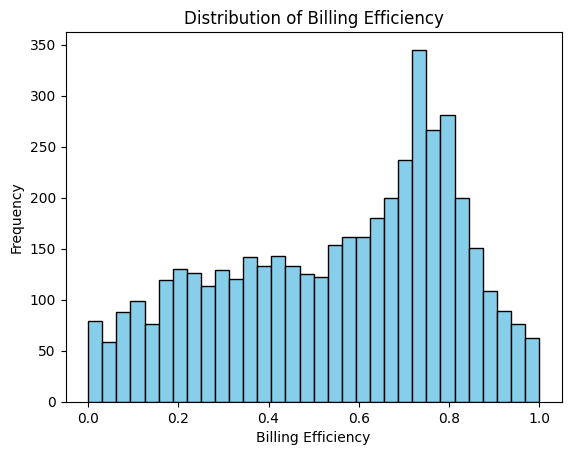

In [184]:
# Ploting histogram of Billing Efficiency
plt.hist(metrics_cleaned['Billing Efficiency'], bins=32, color='skyblue', edgecolor='black')
plt.xlabel('Billing Efficiency')
plt.ylabel('Frequency')
plt.title('Distribution of Billing Efficiency')
plt.show()

***Observations***
1. Fewer Feeders recorded high billing efficiency.
2. Billing efficiency peaked at around 0.7 or 70%.
3. The data is Multi-modal, indicating that the data were collected from more than one process.
4. The distribution is slightly left-skewed, suggesting poor billing efficiency across the board.

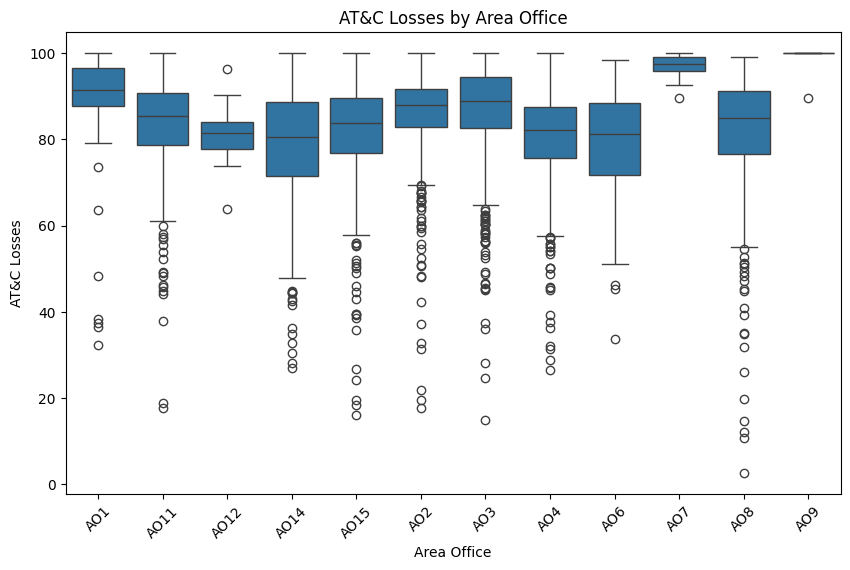

In [186]:
# Ploting box plot of AT&C Losses by Area Office
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area Office', y='AT&C Losses', data=metrics_cleaned)
plt.xlabel('Area Office')
plt.ylabel('AT&C Losses')
plt.title('AT&C Losses by Area Office')
plt.xticks(rotation=45)
plt.show()

***Observations***
1. There are outliers present in the datasets, primarily concentrated within the improved AT&C Losses region.
2. The majority of the data points fall below the 60% AT&C losses threshold.
3. The variability of data in AO11, AO14, AO15, AO3, AO4, AO6, and AO8 is higher, while AO9 exhibits the lowest variability (appearing as a flat line).

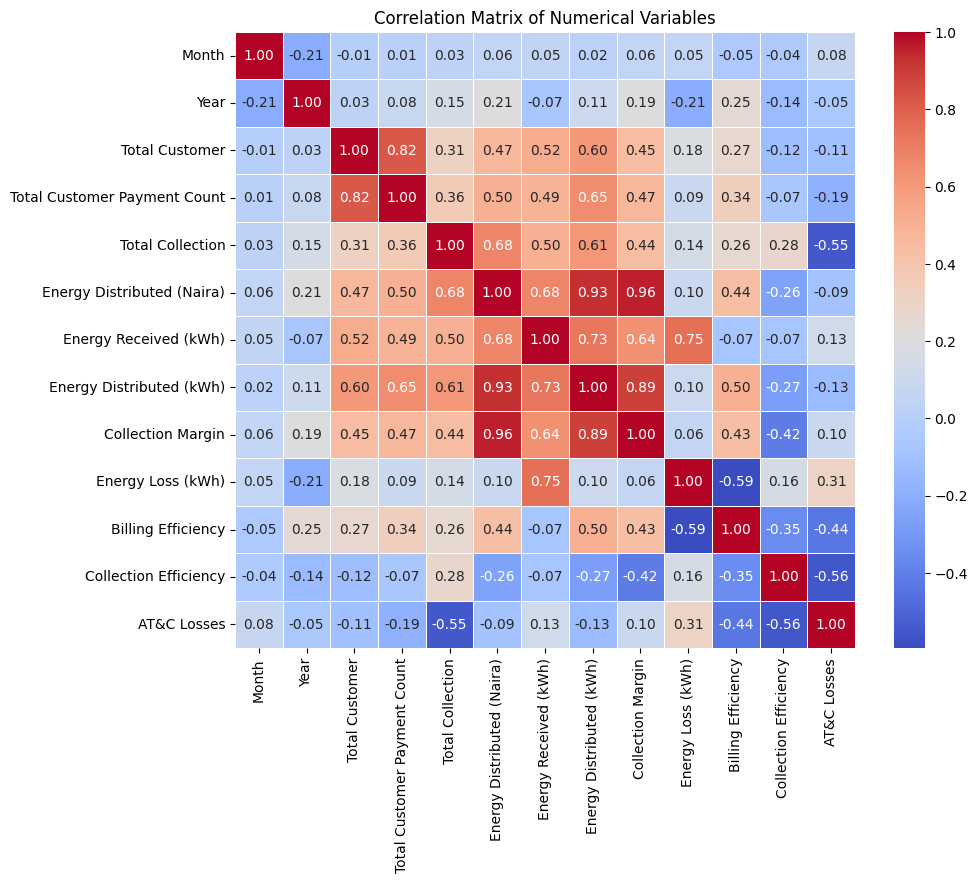

In [187]:
# Filtering out numerical columns
numerical_columns = metrics_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Computing the correlation matrix for numerical columns
corr_matrix = metrics_cleaned[numerical_columns].corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Ploting the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding title
plt.title('Correlation Matrix of Numerical Variables')

# Show plot
plt.show()

***Observations***
1. There is a strong positive correlation (0.82) between Total Customers and Total Customer Payment Count.
2. There is a strong negative correlation (-0.55) between Total Collection and AT&C Losses.
3. There is a strong positive correlation (0.93) between Energy Distributed (Naira) and Energy Distributed (kWh).
4. There is a strong positive correlation (0.96) between Collection Margin and Energy Distributed (Naira).
5. There is a strong negative correlation (-0.59) between Energy Loss (kWh) and Billing Efficiency.
6. There is a strong negative correlation (-0.55) between Collection Efficiency and AT&C Losses.

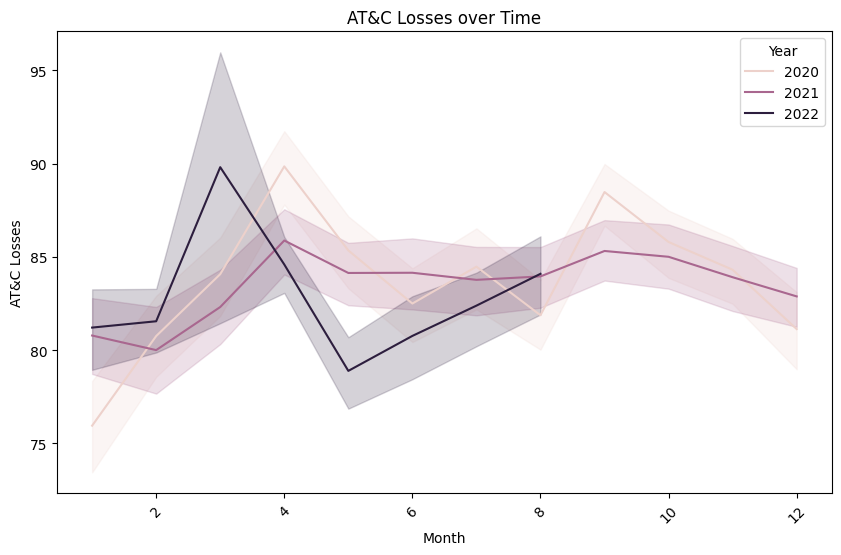

In [188]:
# Ploting line plot of AT&C Losses over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='AT&C Losses', hue='Year', data=metrics_cleaned)
plt.xlabel('Month')
plt.ylabel('AT&C Losses')
plt.title('AT&C Losses over Time')
plt.xticks(rotation=45)
plt.show()

***Observations***
1. There is slight evidence of seasonality in the dataset for 2020 and 2021.
2. AT&C losses are lowest between January to March and October to December.
3. The poorest performance was recorded in 2022 between February and March.
4. In 2020 and 2021, the worst performance was recorded in April.
5. In 2021, from May to December, the performance shows some evidence of a little flatness with fewer distinct peaks.
6. The 2020 data exhibits random waves or peaks, suggesting that AT&C is subject to frequent and unpredictable changes. This could be due to various factors such as market volatility, weather fluctuations, or other external influences.

### Conclusion

Based on the observations and analysis findings from the data exploration, here are some actionable suggestions to enhance the operational efficiency of each Area office:

1. **Outlier Investigation and Mitigation**:
   - Investigate the outliers in the AT&C Losses dataset, especially in the improved AT&C Losses region. Determine the root causes of these outliers and take  actions to improve and replecate them. This could involve identifying and addressing operational inefficiencies, reducing energy losses, and improving billing and collection processes.

2. **Billing Efficiency Improvement**:
   - Focus on improving billing efficiency, particularly for feeders with lower billing efficiency rates. Implement measures such as metering upgrades, data accuracy improvements, and staff training to enhance billing accuracy and reduce errors.

3. **Data-driven Decision Making**:
   - Leverage the insights from the correlation matrix to make data-driven decisions. For example, prioritize efforts to increase total customer payment count, as it is strongly correlated with total customers and indicates a healthy revenue collection process.

4. **Operational Optimization**:
   - Optimize energy distribution processes to minimize losses and improve collection margins. Analyze areas of high energy loss and implement measures such as infrastructure upgrades, maintenance programs, and loss reduction initiatives to enhance operational efficiency.

5. **Seasonal Performance Analysis**:
   - Conduct a detailed analysis of seasonal performance trends, especially during periods of high AT&C losses. Identify factors contributing to poor performance during these periods and develop strategies to address them. This could involve adjusting operational workflows, implementing targeted marketing campaigns, or deploying resources more effectively.

6. **Continuous Monitoring and Improvement**:
   - Establish a system for continuous monitoring of key performance indicators (KPIs) and performance metrics. Regularly review operational data, track progress against targets, and identify areas for improvement. Implement a culture of continuous improvement to drive operational efficiency gains over time.

7. **Cross-Office Knowledge Sharing**:
   - Foster collaboration and knowledge sharing among different Area offices. Encourage the sharing of best practices, successful strategies, and lessons learned to facilitate cross-office learning and improvement. This can help replicate successful initiatives and drive overall performance improvements across the organization.

By implementing these actionable suggestions and leveraging the insights gained from data analysis, each Area office can enhance its operational efficiency, improve performance metrics, and achieve greater success in delivering reliable and efficient energy services to customers.